In [1]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_1=pd.read_csv('admission_predict.csv')

In [3]:
file_1.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


###Exploring the data

In [4]:
file_1.shape

(500, 9)

In [5]:
file_1.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
file_1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
file_1.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
file_1.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [10]:
file_1.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [11]:
file_1=file_1.rename(columns={'GRE Score':"GRE",'TOEFL Score':'TOEFL','LOR ':'LOR','Chance of Admit':'probability'})

In [12]:
file_1.head(2)

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


###Data Visualization

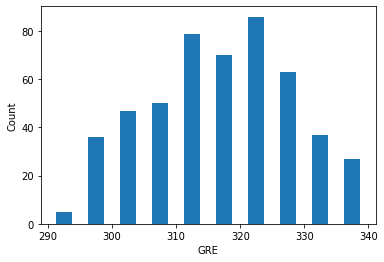

In [17]:
#Viz the feature GRE
fig=plt.hist(file_1['GRE'],rwidth=0.5)
plt.xlabel('GRE')
plt.ylabel('Count')
plt.show()

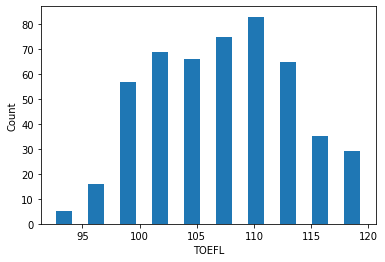

In [18]:
#Viz the feature TOEFL
fig=plt.hist(file_1['TOEFL'],rwidth=0.5)
plt.xlabel('TOEFL')
plt.ylabel('Count')
plt.show()

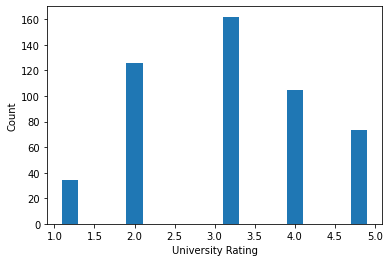

In [19]:
#Viz the feature University Rating
fig=plt.hist(file_1['University Rating'],rwidth=0.5)
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

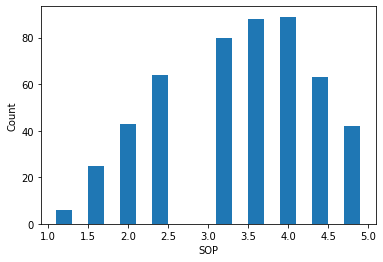

In [20]:
#Viz the feature SOP
fig=plt.hist(file_1['SOP'],rwidth=0.5)
plt.xlabel('SOP')
plt.ylabel('Count')
plt.show()

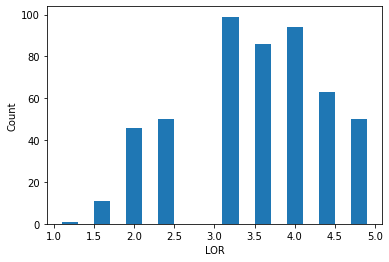

In [21]:
#Viz the feature LOR
fig=plt.hist(file_1['LOR'],rwidth=0.5)
plt.xlabel('LOR')
plt.ylabel('Count')
plt.show()

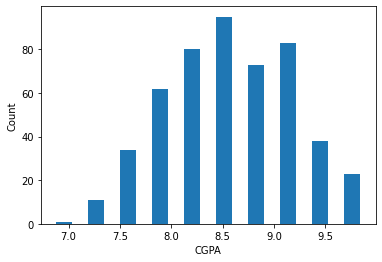

In [22]:
#Viz the feature CGPA
fig=plt.hist(file_1['CGPA'],rwidth=0.5)
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

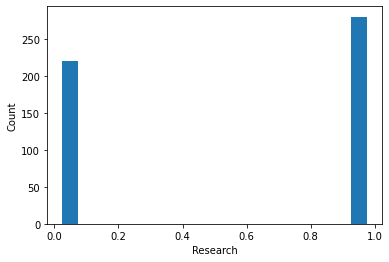

In [23]:
#Viz the feature Research
fig=plt.hist(file_1['Research'],rwidth=0.5)
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

###Data Cleaning

In [24]:
file_1.columns

Index(['Serial No.', 'GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [25]:
file_1=file_1.drop(columns='Serial No.',axis=1)

###Model Buiding

In [37]:
X=file_1.drop('Chance of Admit ',axis=1)
y=file_1['Chance of Admit ']

In [38]:

# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [61]:
#creating the function
def find_best_model(X,y):
  models={
      'linear regression':{
          'model':LinearRegression(),
          'parameters':{
            'normalize':[True,False]
          }
      },

      'lasso':{
          
          'model':Lasso(), 
          'parameters':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
          }
      },
      'svr':{
          'model':SVR(),
          'parameters':{
            'gamma': ['auto','scale'] 
              
          }
      },
      'decision tree':{
          'model':DecisionTreeRegressor(),
          'parameters':{
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
          }
      },
      'random forest':{
          'model':RandomForestRegressor(),
          'parameters': {
            'n_estimators': [5,10,15,20]
          }
      },
      'knn':{
          'model':KNeighborsRegressor(algorithm='auto'),
            'parameters': {
            'n_neighbors': [2,5,10,20]
          }
      }

  }

  scores = []
  for model_name,model_param in models.items():
    gs=GridSearchCV(model_param['model'],model_param['parameters'],cv=5,return_train_score=False)
    gs.fit(X,y)
    scores.append({
      'model':model_name,
      'best_parameter':gs.best_params_,
      'accuracy':gs.best_score_
  }
  )
  return(pd.DataFrame(scores,columns=['model','best_parameter','accuracy']))

find_best_model(X,y)

,model,best_parameter,accuracy
0,linear regression,{'normalize': False},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,decision tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.580681
4,random forest,{'n_estimators': 20},0.773465
5,knn,{'n_neighbors': 20},0.722961


In [62]:
#Since linear regression has the highest accuracy
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(normalize=False),X,y,cv=5)
print('highest score',score)

highest score [0.67763918 0.79424809 0.86447645 0.81935698 0.89828691]


In [65]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
lin_reg=LinearRegression(normalize=False)
lin_reg.fit(X_tr,y_tr)
lin_reg.score(X_te,y_te)

0.8188432567829629